### Data dictionary 
> 1. age 
> 2. sex 
> 3. chest pain type (4 values) 
> 4. resting blood pressure 
> 5. serum cholestoral in mg/dl 
> 6. fasting blood sugar > 120 mg/dl
> 7. resting electrocardiographic results (values 0,1,2)
> 8. maximum heart rate achieved 
> 9. exercise induced angina 
> 10. oldpeak = ST depression induced by exercise relative to rest 
> 11. the slope of the peak exercise ST segment 
> 12. number of major vessels (0-3) colored by flourosopy 
> 13. thal: 3 = normal; 6 = fixed defect; 7 = reversable defect

Based on data dictionary we have 
    Categorical variables:
        * sex
        * cp - chest pain type  
        * thal
        * slop 
        * restecg
        * fbs
        * ca
        

In [1]:
%matplotlib inline
import numpy as np
import pandas as pd
import scipy
from sklearn.model_selection import train_test_split
from sklearn import linear_model
from sklearn.decomposition import PCA
import matplotlib.pyplot as plt
import seaborn as sns
from IPython.core.interactiveshell import InteractiveShell
InteractiveShell.ast_node_interactivity = "all"
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split, GridSearchCV


In [2]:

df=pd.read_csv('..\..\datasets\heart-disease\heart.csv', encoding='utf-8-sig')
#

In [3]:
print("\n -----------------Data head ---------------\n")
df.head(5)
print("\n -----------------Data tail ---------------\n")
df.tail(5)
print("\n -----------------Data types and counts---------------\n")
df.info()
print("\n -----------------Simple statistics for each variable -----------\n")
df.describe().T
print("\n ----------------Count  All missing!!-------------------\n")
df.isnull().sum()
print("\n --------------------All categorical features with number of unique values\n")
categorical = df.select_dtypes(include=['object'])
if categorical.empty: 
     print("---- No categorical features by data type ---")
else :        
    for i in categorical:
        column = categorical[i]
        print(i)
        print(column.nunique())


 -----------------Data head ---------------



,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1



 -----------------Data tail ---------------



,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
298,57,0,0,140,241,0,1,123,1,0.2,1,0,3,0
299,45,1,3,110,264,0,1,132,0,1.2,1,0,3,0
300,68,1,0,144,193,1,1,141,0,3.4,1,2,3,0
301,57,1,0,130,131,0,1,115,1,1.2,1,1,3,0
302,57,0,1,130,236,0,0,174,0,0.0,1,1,2,0



 -----------------Data types and counts---------------

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 303 entries, 0 to 302
Data columns (total 14 columns):
age         303 non-null int64
sex         303 non-null int64
cp          303 non-null int64
trestbps    303 non-null int64
chol        303 non-null int64
fbs         303 non-null int64
restecg     303 non-null int64
thalach     303 non-null int64
exang       303 non-null int64
oldpeak     303 non-null float64
slope       303 non-null int64
ca          303 non-null int64
thal        303 non-null int64
target      303 non-null int64
dtypes: float64(1), int64(13)
memory usage: 33.2 KB

 -----------------Simple statistics for each variable -----------



,count,mean,std,min,25%,50%,75%,max
age,303.0,54.366337,9.082101,29.0,47.5,55.0,61.0,77.0
sex,303.0,0.683168,0.466011,0.0,0.0,1.0,1.0,1.0
cp,303.0,0.966997,1.032052,0.0,0.0,1.0,2.0,3.0
trestbps,303.0,131.623762,17.538143,94.0,120.0,130.0,140.0,200.0
chol,303.0,246.264026,51.830751,126.0,211.0,240.0,274.5,564.0
fbs,303.0,0.148515,0.356198,0.0,0.0,0.0,0.0,1.0
restecg,303.0,0.528053,0.525860,0.0,0.0,1.0,1.0,2.0
thalach,303.0,149.646865,22.905161,71.0,133.5,153.0,166.0,202.0
exang,303.0,0.326733,0.469794,0.0,0.0,0.0,1.0,1.0
oldpeak,303.0,1.039604,1.161075,0.0,0.0,0.8,1.6,6.2



 ----------------Count  All missing!!-------------------



age         0
sex         0
cp          0
trestbps    0
chol        0
fbs         0
restecg     0
thalach     0
exang       0
oldpeak     0
slope       0
ca          0
thal        0
target      0
dtype: int64


 --------------------All categorical features with number of unique values

---- No categorical features by data type ---


In [4]:
# based on this 
num_col_list=['age','trestbps','chol','oldpeak']
cat_col_list=[ 'sex','cp','thal','fbs','ca','restecg','slope','exang']
for c in cat_col_list:
    print ("---------------------")
    df[c].value_counts()
    

---------------------


1    207
0     96
Name: sex, dtype: int64

---------------------


0    143
2     87
1     50
3     23
Name: cp, dtype: int64

---------------------


2    166
3    117
1     18
0      2
Name: thal, dtype: int64

---------------------


0    258
1     45
Name: fbs, dtype: int64

---------------------


0    175
1     65
2     38
3     20
4      5
Name: ca, dtype: int64

---------------------


1    152
0    147
2      4
Name: restecg, dtype: int64

---------------------


2    142
1    140
0     21
Name: slope, dtype: int64

---------------------


0    204
1     99
Name: exang, dtype: int64

# we need to onehot all ofthem 
def oneHotall(df,toOneHotList)
    for col in toOneHotList:
        name="lb_"+str(c)
        globals()[name] = OneHotEncoder()
        globals()[name] = df[c]

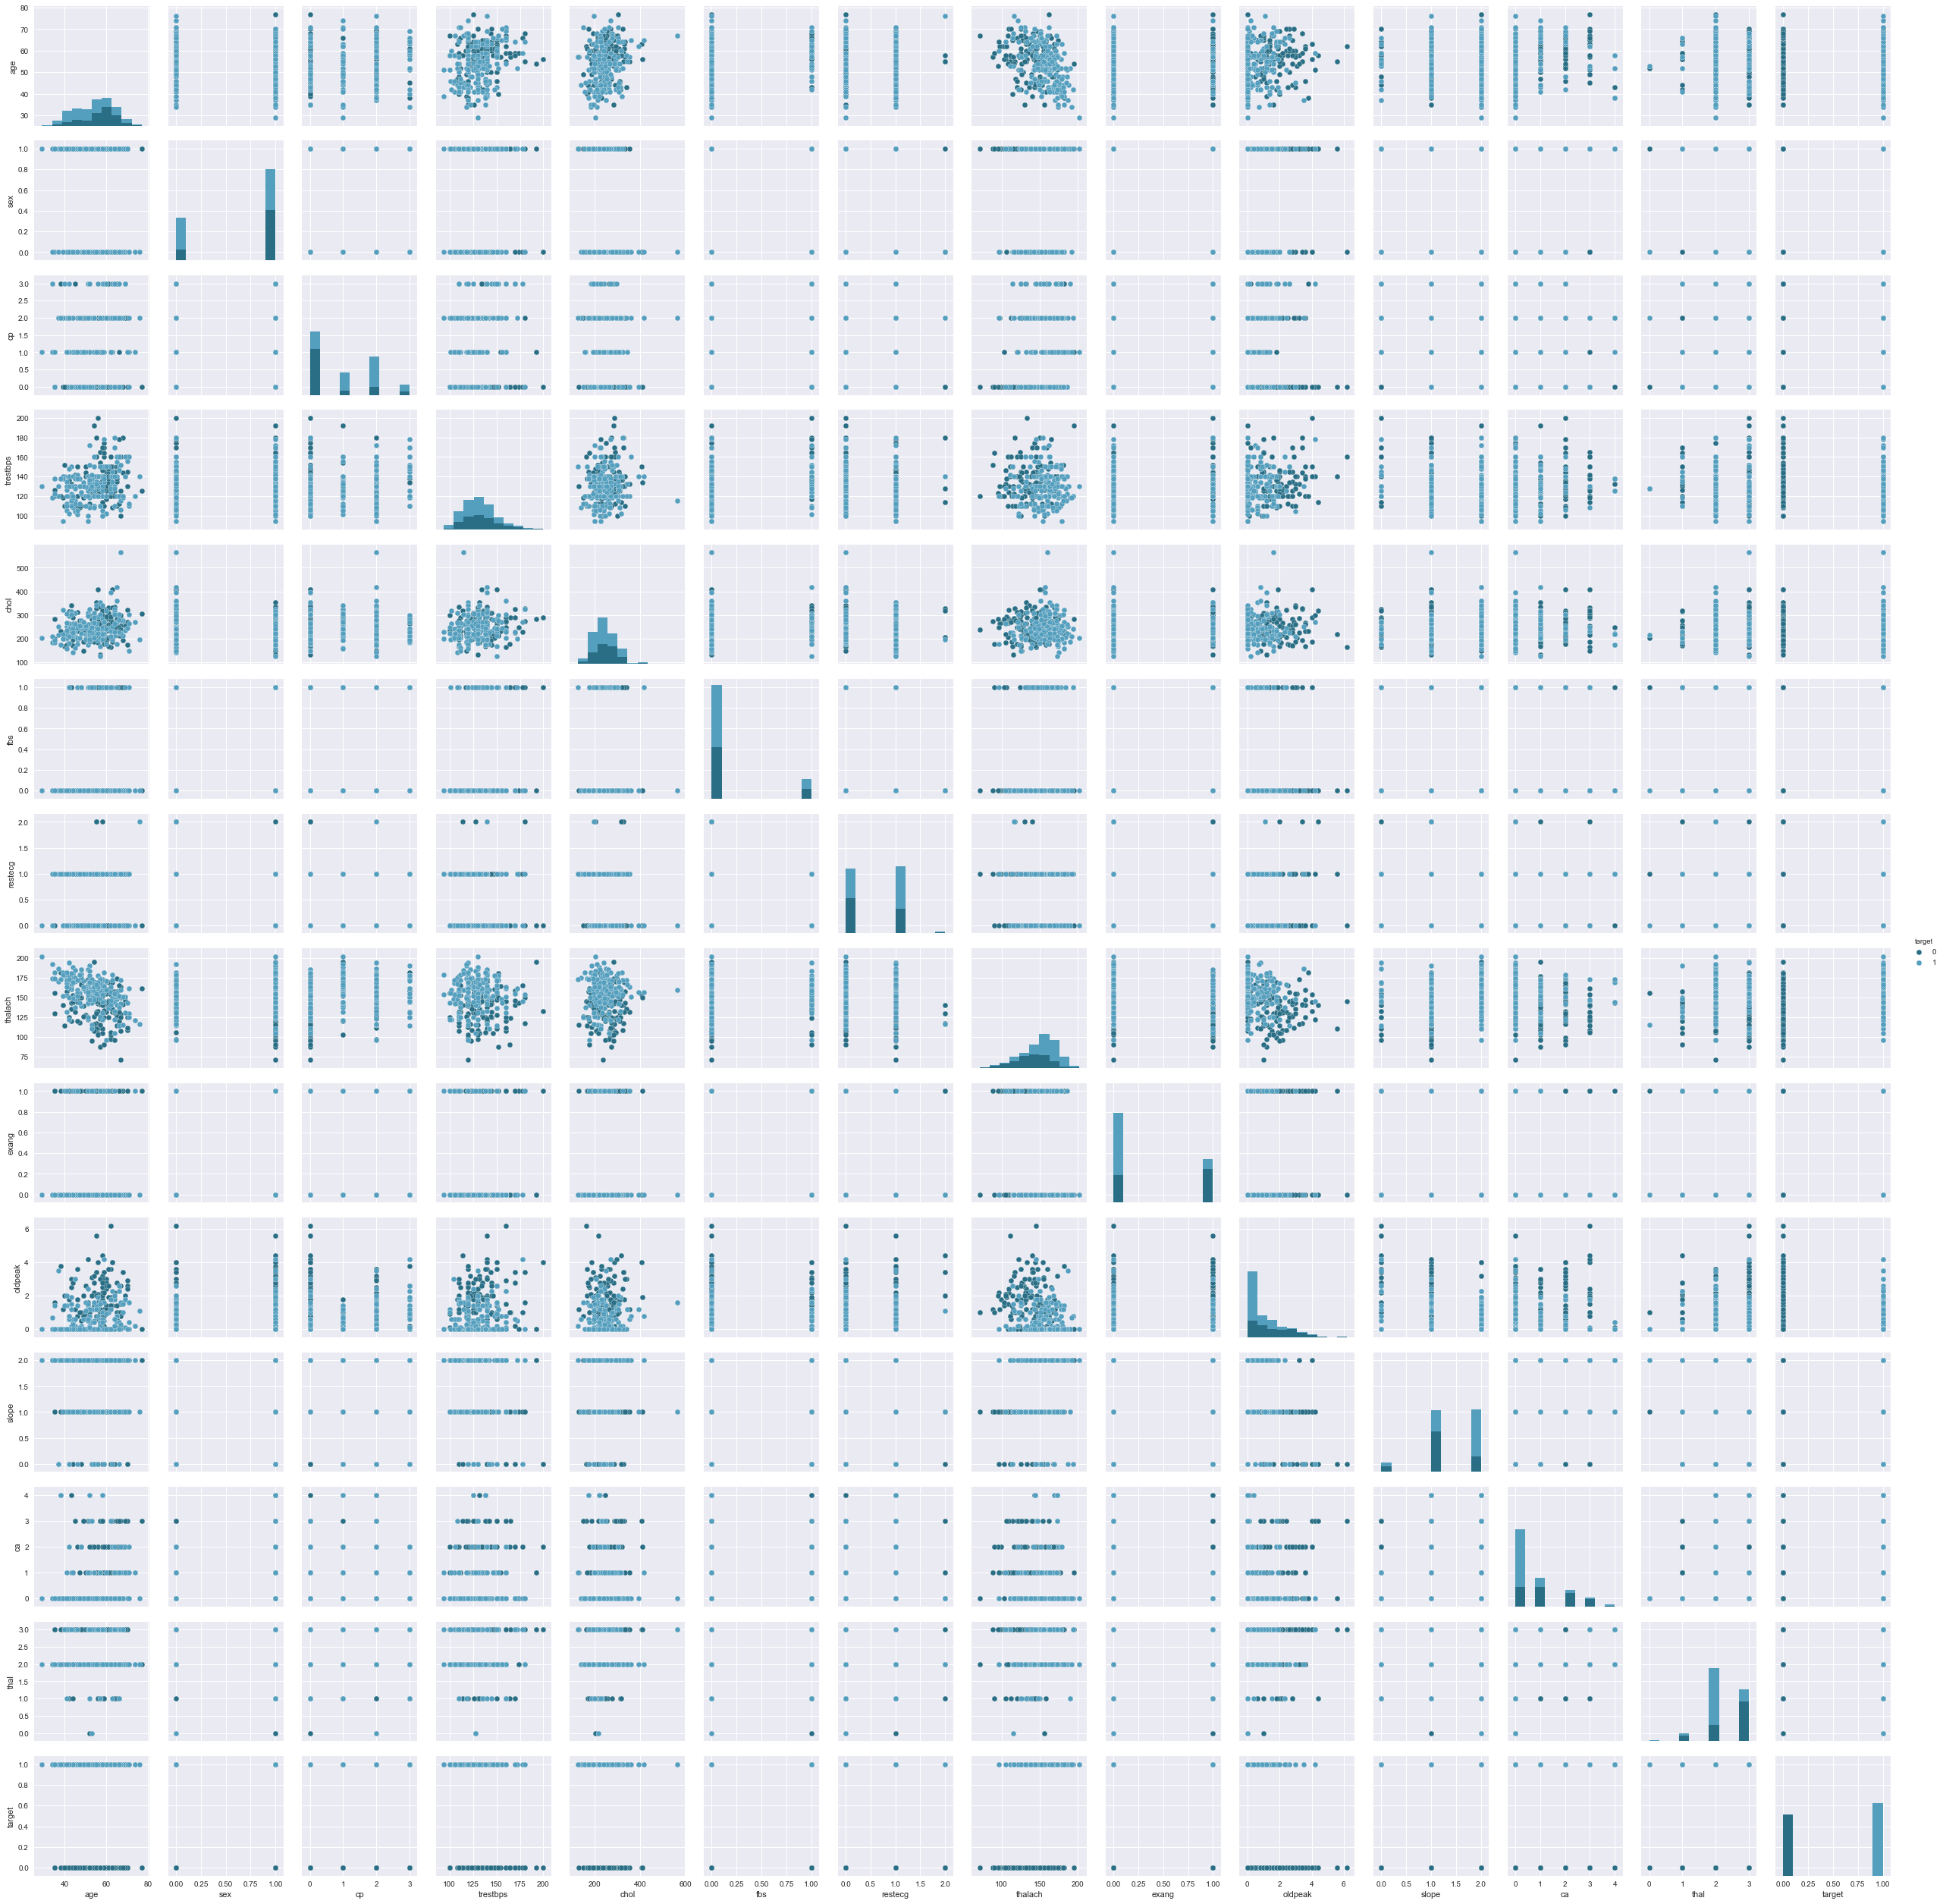

In [6]:
sns.pairplot(data=df, hue='target', palette='PuBuGn_d')


<Figure size 648x576 with 0 Axes>

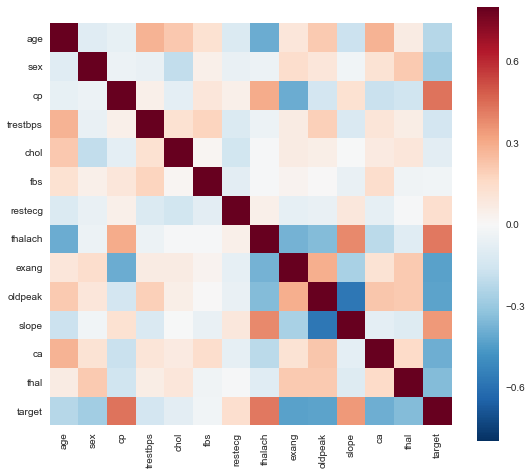

In [7]:
corrmat = df.corr()
plt.figure(figsize=(9, 8))
sns.heatmap(corrmat, vmax=.8, square=True)
plt.show()

In [8]:
# double check the distribution for the outcome!!!
df['target'].value_counts()

1    165
0    138
Name: target, dtype: int64

C:\Users\Vadim\Anaconda3\lib\site-packages\seaborn\categorical.py:1428: FutureWarning: remove_na is deprecated and is a private function. Do not use.
  stat_data = remove_na(group_data)


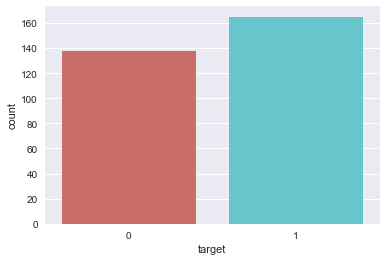

In [9]:
sns.countplot(x=df['target'], data=df, palette='hls')
plt.show()

<Figure size 648x720 with 0 Axes>

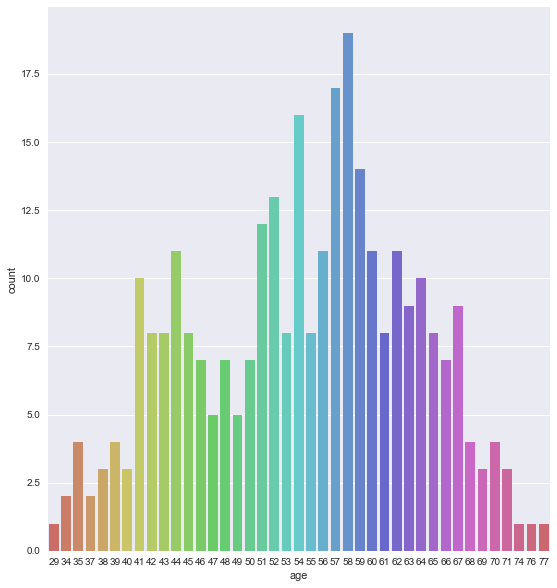

In [10]:
plt.figure(figsize=(9, 10))
sns.countplot(x=df['age'], data=df, palette='hls')
plt.show()

In [11]:
print(list(df))

['age', 'sex', 'cp', 'trestbps', 'chol', 'fbs', 'restecg', 'thalach', 'exang', 'oldpeak', 'slope', 'ca', 'thal', 'target']


In [12]:
Y=df['target']
X=df.drop('target', axis=1)
X_train, X_test, y_train, y_test = train_test_split(X,Y, test_size=0.2)
X.shape

(303, 13)

In [13]:

Y.shape

(303,)

In [14]:
print(num_col_list)

['age', 'trestbps', 'chol', 'oldpeak']


In [15]:
X_num=X[num_col_list]
X_cat=X[cat_col_list]


Standardization is a useful technique to transform attributes with a Gaussian distribution and differing means and standard deviations to a standard Gaussian distribution with a mean of 0 and a standard deviation of 1.
Cool link!
https://scikit-learn.org/stable/auto_examples/preprocessing/plot_all_scaling.html

In [16]:
scaler = StandardScaler() # ther possible choice Normalizer  minMax
sc_arr = scaler.fit_transform(X_num)
scaled_df = pd.DataFrame(sc_arr, columns=['age', 'trestbps', 'chol', 'oldpeak'])
scaled_df.head(5)                                          

C:\Users\Vadim\Anaconda3\lib\site-packages\sklearn\preprocessing\data.py:625: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by StandardScaler.
  return self.partial_fit(X, y)
C:\Users\Vadim\Anaconda3\lib\site-packages\sklearn\base.py:462: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by StandardScaler.
  return self.fit(X, **fit_params).transform(X)


,age,trestbps,chol,oldpeak
0,0.952197,0.763956,-0.256334,1.087338
1,-1.915313,-0.092738,0.072199,2.122573
2,-1.474158,-0.092738,-0.816773,0.310912
3,0.180175,-0.663867,-0.198357,-0.206705
4,0.290464,-0.663867,2.082050,-0.379244


In [17]:
#
# for each column print unique values 
#

ls= [str(i) +"_" + str(j) for i in cat_col_list for j in X_cat[i].unique() ] 
print(ls)
print("list len ->" + str(len(ls)))

['sex_1', 'sex_0', 'cp_3', 'cp_2', 'cp_1', 'cp_0', 'thal_1', 'thal_2', 'thal_3', 'thal_0', 'fbs_1', 'fbs_0', 'ca_0', 'ca_2', 'ca_1', 'ca_3', 'ca_4', 'restecg_0', 'restecg_1', 'restecg_2', 'slope_0', 'slope_2', 'slope_1', 'exang_0', 'exang_1']
list len ->25


In [18]:
#-------------------------------------------------------------

onehotencoder = OneHotEncoder(sparse=False)
x_cat_arr_1h = onehotencoder.fit_transform(X_cat)
x_cat_arr_1h.shape 
print(type(x_cat_arr_1h))
x_cat_1h = pd.DataFrame(data=x_cat_arr_1h, columns = ls)
x_cat_1h.head(5)


C:\Users\Vadim\Anaconda3\lib\site-packages\sklearn\preprocessing\_encoders.py:368: FutureWarning: The handling of integer data will change in version 0.22. Currently, the categories are determined based on the range [0, max(values)], while in the future they will be determined based on the unique values.
If you want the future behaviour and silence this warning, you can specify "categories='auto'".
In case you used a LabelEncoder before this OneHotEncoder to convert the categories to integers, then you can now use the OneHotEncoder directly.
  warnings.warn(msg, FutureWarning)


(303, 25)

<class 'numpy.ndarray'>


,sex_1,sex_0,cp_3,cp_2,cp_1,cp_0,thal_1,thal_2,thal_3,thal_0,...,ca_3,ca_4,restecg_0,restecg_1,restecg_2,slope_0,slope_2,slope_1,exang_0,exang_1
0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,...,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0
1,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,...,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,1.0,0.0
2,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,...,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0
3,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,1.0,0.0
4,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,1.0


In [19]:
df_tr=pd.concat([scaled_df,x_cat_1h], axis=1 )

In [20]:
df_tr.head(5)

,age,trestbps,chol,oldpeak,sex_1,sex_0,cp_3,cp_2,cp_1,cp_0,...,ca_3,ca_4,restecg_0,restecg_1,restecg_2,slope_0,slope_2,slope_1,exang_0,exang_1
0,0.952197,0.763956,-0.256334,1.087338,0.0,1.0,0.0,0.0,0.0,1.0,...,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0
1,-1.915313,-0.092738,0.072199,2.122573,0.0,1.0,0.0,0.0,1.0,0.0,...,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,1.0,0.0
2,-1.474158,-0.092738,-0.816773,0.310912,1.0,0.0,0.0,1.0,0.0,0.0,...,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0
3,0.180175,-0.663867,-0.198357,-0.206705,0.0,1.0,0.0,1.0,0.0,0.0,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,1.0,0.0
4,0.290464,-0.663867,2.082050,-0.379244,1.0,0.0,1.0,0.0,0.0,0.0,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,1.0


In [21]:
lr_l1 = LogisticRegression(solver='liblinear', penalty='l1')
lr_l1.fit(X_train, y_train)



LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='warn',
          n_jobs=None, penalty='l1', random_state=None, solver='liblinear',
          tol=0.0001, verbose=0, warm_start=False)

In [22]:
print("model score: %.3f" % lr_l1.score(X_test, y_test))

model score: 0.836


In [23]:
lr_l2 = LogisticRegression(solver='liblinear', penalty='l2')
lr_l2.fit(X_train, y_train)
print("model score: %.3f" % lr_l2.score(X_test, y_test))

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='warn',
          n_jobs=None, penalty='l2', random_state=None, solver='liblinear',
          tol=0.0001, verbose=0, warm_start=False)

model score: 0.836


In [24]:
print('----------------lr_l1 -------------') 
print(lr_l1.coef_)
print('----------------lr_l2 -------------') 
print(lr_l2.coef_)


----------------lr_l1 -------------
[[ 0.01119298 -1.28731819  0.98711473 -0.01579319 -0.00392689  0.
   0.47742026  0.02882302 -0.67416801 -0.39845273  0.72120744 -0.67702367
  -0.84888867]]
----------------lr_l2 -------------
[[ 0.00960588 -1.24242547  0.9801669  -0.01679974 -0.00375847  0.22770369
   0.55676137  0.02682501 -0.74695183 -0.41678933  0.74718948 -0.70897322
  -0.87263296]]


Vanilla logistic regression ?
Ridge logistic regression (L2)
Lasso logistic regression (L1)

In [25]:
#Let's make a pipeline:
# 
# preprocessor:  categorical transformation, scaling
# 
# We create the preprocessing pipelines for both numeric and categorical data.


numeric_features = num_col_list
numeric_transformer = Pipeline(steps=[
#    ('imputer', SimpleImputer(strategy='median')),   # we don't need in this case, but I'l keep it for future reference
    ('scaler', StandardScaler())])                   # this is standard and necessary

categorical_features = cat_col_list
categorical_transformer = Pipeline(steps=[
 #   ('imputer', SimpleImputer(strategy='constant', fill_value='missing')),   #  don't need but keep 
    ('onehot', OneHotEncoder(handle_unknown='ignore'))])



preprocessor = ColumnTransformer(
    transformers=[
        ('num', numeric_transformer, numeric_features),
        ('cat', categorical_transformer, categorical_features)])
#
# possible step for feature  extraction# Create a pca object
# pca = decomposition.PCA()
#
# Append classifier to preprocessing pipeline.
# Now we have a full prediction pipeline.

# Create a list of options for the regularization penalty



In [26]:
clf = Pipeline(steps=[('preprocessor', preprocessor),
                      ('classifier', LogisticRegression(solver='liblinear'))]) # solver chosen because of small dataset

# Fit t
clf.fit(X_train, y_train)
print("model score: %.3f" % clf.score(X_test, y_test))

C:\Users\Vadim\Anaconda3\lib\site-packages\sklearn\preprocessing\data.py:625: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by StandardScaler.
  return self.partial_fit(X, y)
C:\Users\Vadim\Anaconda3\lib\site-packages\sklearn\base.py:465: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by StandardScaler.
  return self.fit(X, y, **fit_params).transform(X)


Pipeline(memory=None,
     steps=[('preprocessor', ColumnTransformer(n_jobs=None, remainder='drop', sparse_threshold=0.3,
         transformer_weights=None,
         transformers=[('num', Pipeline(memory=None,
     steps=[('scaler', StandardScaler(copy=True, with_mean=True, with_std=True))]), ['age', 'trestbps', 'chol', 'oldp...ty='l2', random_state=None, solver='liblinear',
          tol=0.0001, verbose=0, warm_start=False))])

model score: 0.836


C:\Users\Vadim\Anaconda3\lib\site-packages\sklearn\pipeline.py:451: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by StandardScaler.
  Xt = transform.transform(Xt)


In [27]:
CLF_L1 = Pipeline(steps=[('preprocessor', preprocessor),
                      ('classifier', LogisticRegression(penalty='l1', solver='liblinear'))]) # solver chosen because of small dataset

# Fit t
CLF_L1.fit(X_train, y_train)
print("model score: %.3f" % CLF_L1.score(X_test, y_test))

C:\Users\Vadim\Anaconda3\lib\site-packages\sklearn\preprocessing\data.py:625: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by StandardScaler.
  return self.partial_fit(X, y)
C:\Users\Vadim\Anaconda3\lib\site-packages\sklearn\base.py:465: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by StandardScaler.
  return self.fit(X, y, **fit_params).transform(X)


Pipeline(memory=None,
     steps=[('preprocessor', ColumnTransformer(n_jobs=None, remainder='drop', sparse_threshold=0.3,
         transformer_weights=None,
         transformers=[('num', Pipeline(memory=None,
     steps=[('scaler', StandardScaler(copy=True, with_mean=True, with_std=True))]), ['age', 'trestbps', 'chol', 'oldp...ty='l1', random_state=None, solver='liblinear',
          tol=0.0001, verbose=0, warm_start=False))])

model score: 0.869


C:\Users\Vadim\Anaconda3\lib\site-packages\sklearn\pipeline.py:451: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by StandardScaler.
  Xt = transform.transform(Xt)


In [28]:
CLF_L2 = Pipeline(steps=[('preprocessor', preprocessor),
                      ('classifier', LogisticRegression(penalty='l2', solver='liblinear'))]) # solver chosen because of small dataset

# Fit t
CLF_L2.fit(X_train, y_train)
print("model score: %.3f" % CLF_L2.score(X_test, y_test))

C:\Users\Vadim\Anaconda3\lib\site-packages\sklearn\preprocessing\data.py:625: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by StandardScaler.
  return self.partial_fit(X, y)
C:\Users\Vadim\Anaconda3\lib\site-packages\sklearn\base.py:465: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by StandardScaler.
  return self.fit(X, y, **fit_params).transform(X)


Pipeline(memory=None,
     steps=[('preprocessor', ColumnTransformer(n_jobs=None, remainder='drop', sparse_threshold=0.3,
         transformer_weights=None,
         transformers=[('num', Pipeline(memory=None,
     steps=[('scaler', StandardScaler(copy=True, with_mean=True, with_std=True))]), ['age', 'trestbps', 'chol', 'oldp...ty='l2', random_state=None, solver='liblinear',
          tol=0.0001, verbose=0, warm_start=False))])

model score: 0.836


C:\Users\Vadim\Anaconda3\lib\site-packages\sklearn\pipeline.py:451: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by StandardScaler.
  Xt = transform.transform(Xt)


In [29]:
CLF_ng = Pipeline(steps=[('preprocessor', preprocessor),
                      ('classifier', LogisticRegression(penalty='l2', solver='newton-cg'))]) # solver chosen because of small dataset

# Fit t
CLF_ng.fit(X_train, y_train)
print("model score: %.3f" % CLF_ng.score(X_test, y_test))

C:\Users\Vadim\Anaconda3\lib\site-packages\sklearn\preprocessing\data.py:625: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by StandardScaler.
  return self.partial_fit(X, y)
C:\Users\Vadim\Anaconda3\lib\site-packages\sklearn\base.py:465: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by StandardScaler.
  return self.fit(X, y, **fit_params).transform(X)


Pipeline(memory=None,
     steps=[('preprocessor', ColumnTransformer(n_jobs=None, remainder='drop', sparse_threshold=0.3,
         transformer_weights=None,
         transformers=[('num', Pipeline(memory=None,
     steps=[('scaler', StandardScaler(copy=True, with_mean=True, with_std=True))]), ['age', 'trestbps', 'chol', 'oldp...ty='l2', random_state=None, solver='newton-cg',
          tol=0.0001, verbose=0, warm_start=False))])

model score: 0.836


C:\Users\Vadim\Anaconda3\lib\site-packages\sklearn\pipeline.py:451: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by StandardScaler.
  Xt = transform.transform(Xt)


In [ ]:
#penalty = ['l1', 'l2']
#C = np.logspace(-1, 2)
#classifier__C=C,
#param_grid = dict( classifier__penalty=penalty)
#grid_search = GridSearchCV(clf, param_grid, cv=10, iid=False)
#grid_search.fit(X_train, y_train)

#print(("best logistic regression from grid search: %.3f"
#       % grid_search.score(X_test, y_test)))
